# Elastix

This notebooks show very basic image registration examples with on-the-fly generated binary images.

In [1]:
from itk import itkElastixRegistrationMethodPython
from itk import itkTransformixFilterPython
import itk
import numpy as np
import matplotlib.pyplot as plt

## Image generators

In [15]:
def imageGenerator(x1, x2, y1, y2):
    image = np.zeros([100, 100], np.float32)
    for x in range(x1, x2):
        for y in range(y1, y2):
            image[x, y] = 1
    return image

In [16]:
def imageGeneratorBspline(x1, x2, y1, y2):
    image = np.zeros([100, 100], np.float32)
    for x in range(x1, x2):
        for y in range(y1, y2):
            y += x 
            if x>99 or y>99:
                pass
            else:
                image[x, y] = 1
    return image

## Rigid Test

In [17]:
# Create rigid transformed test images
fixed_image = imageGenerator(25,75,25,75)
moving_image = imageGenerator(1,51,10,60)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid')
parameter_object.AddParameterMap(default_rigid_parameter_map)

In [18]:
# Call registration function
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    parameter_object=parameter_object,
    log_to_console=True)

### Visualization Rigid Test

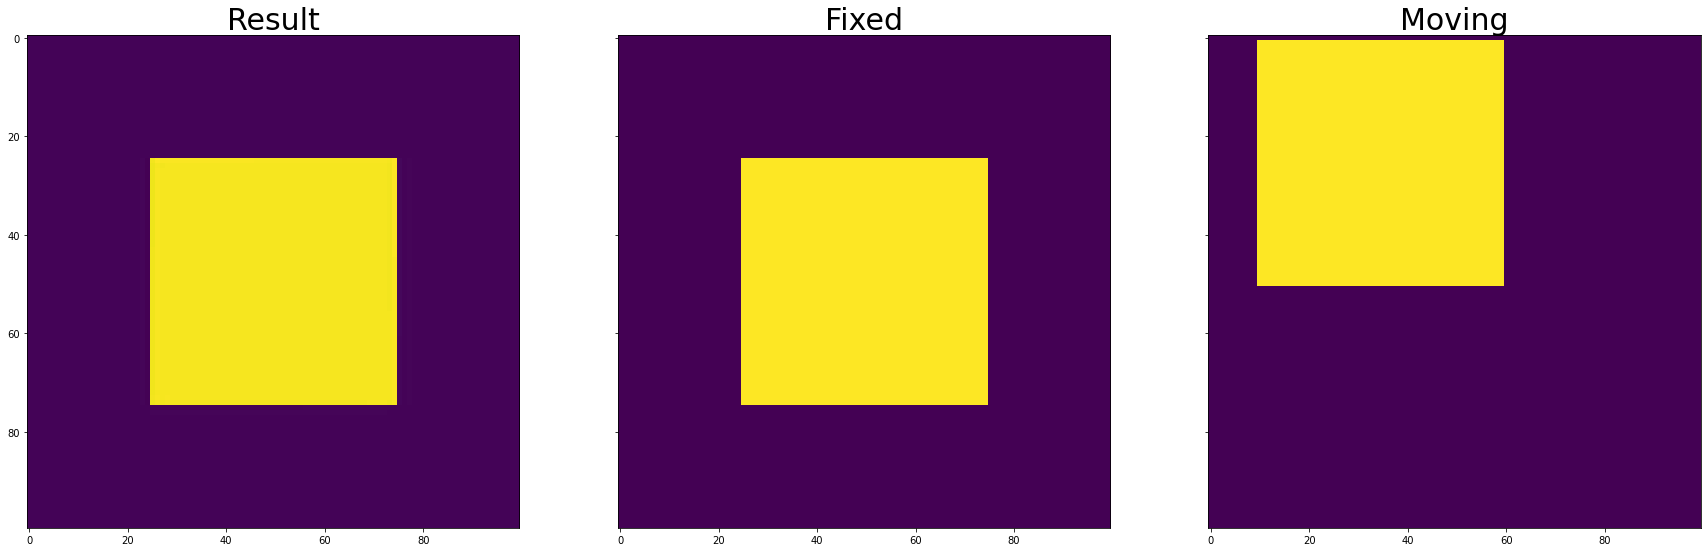

In [19]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image)
axs[2].set_title('Moving', fontsize=30)
plt.show()

## Affine Test

In [29]:
# Create test images
fixed_image_affine = imageGenerator(25,75,25,75)
moving_image_affine = imageGenerator(1,71,1,91)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_affine_parameter_map = parameter_object.GetDefaultParameterMap('affine')
parameter_object.AddParameterMap(default_affine_parameter_map)

In [30]:
# Call registration function
result_image_affine, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_affine, moving_image_affine,
    parameter_object=parameter_object,
    log_to_console=True)

### Visualization Affine Test

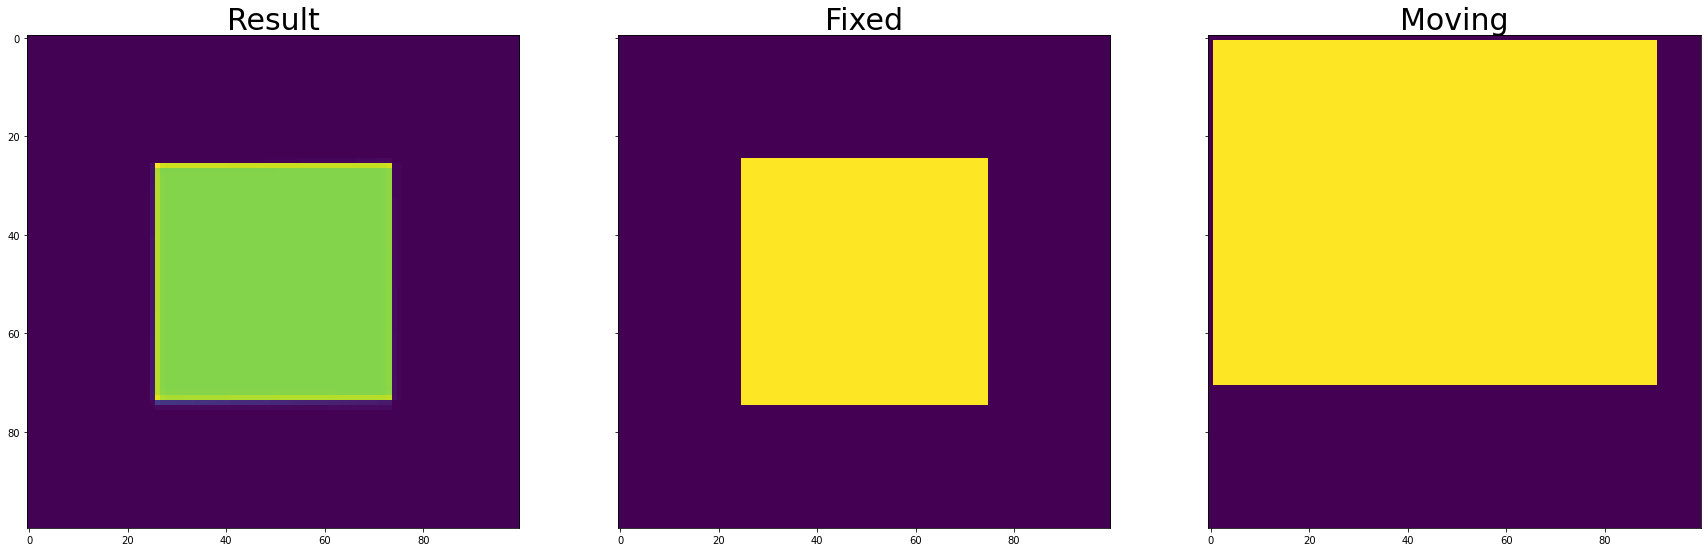

In [31]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_affine)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image_affine)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image_affine)
axs[2].set_title('Moving', fontsize=30)
plt.show()

## Bspline Test

In [26]:
# Create test images
fixed_image_bspline = imageGenerator(25,65,25,65)
moving_image_bspline = imageGeneratorBspline(5,55,5,40)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_affine_parameter_map = parameter_object.GetDefaultParameterMap('affine')
parameter_object.AddParameterMap(default_affine_parameter_map)
default_bspline_parameter_map = parameter_object.GetDefaultParameterMap('bspline')
parameter_object.AddParameterMap(default_bspline_parameter_map)

In [27]:
# Call registration function
result_image_bspline, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_bspline, moving_image_bspline,
    parameter_object=parameter_object,
    log_to_console=True)

### Bspline Test Visualization

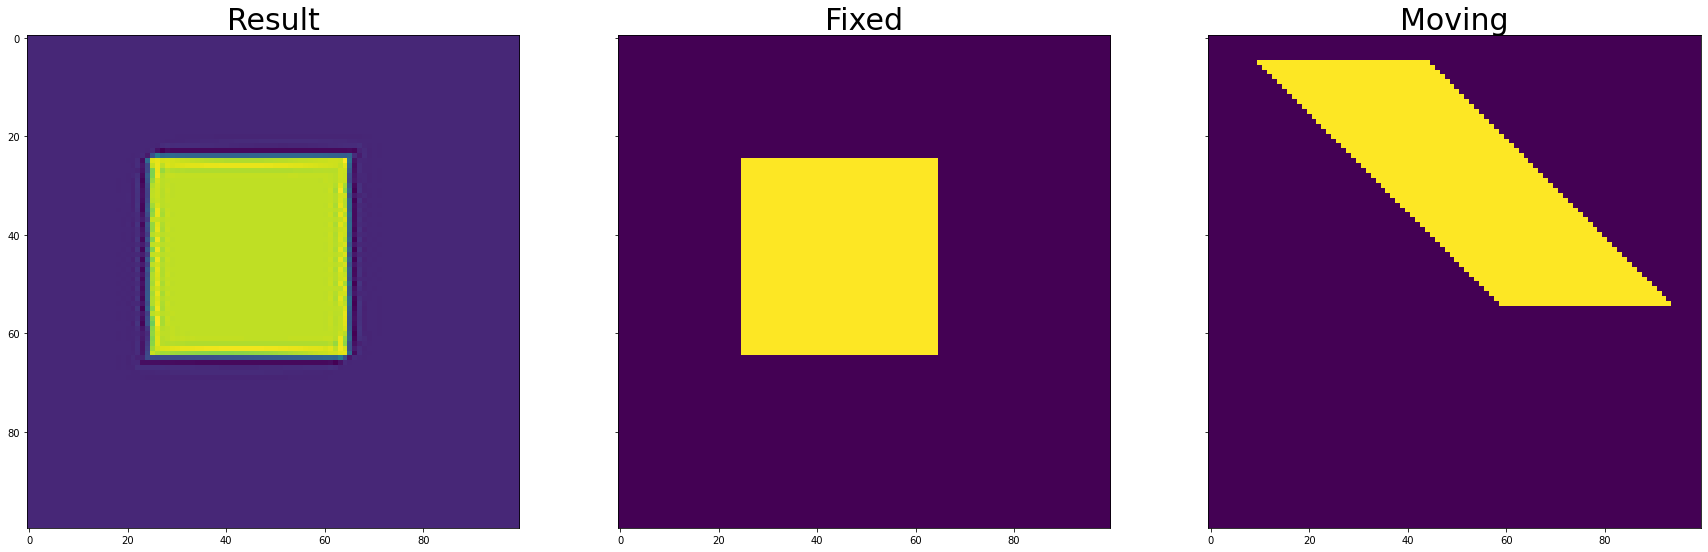

In [28]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_bspline)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image_bspline)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image_bspline)
axs[2].set_title('Moving', fontsize=30)
plt.show()